# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

Based on the requirements of the pharmacy administrator, the boxplot better suits their needs. The box plot presents statistical metrics like the min, max, median, 25% and 75%. It represents the distribution just as well as the barchart and also provides individual samples outside the distribution. Improvements that could be made to the boxplot include labels for the quantities in the inner quartile range.

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

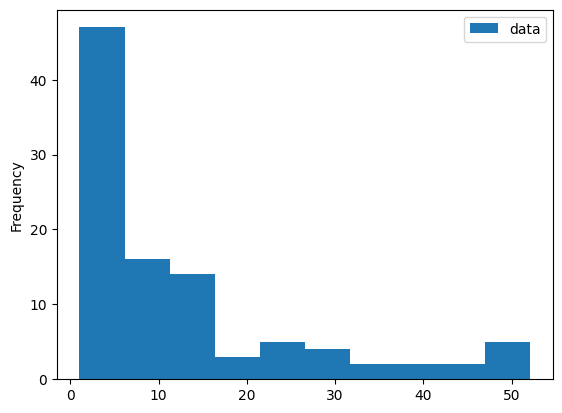

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

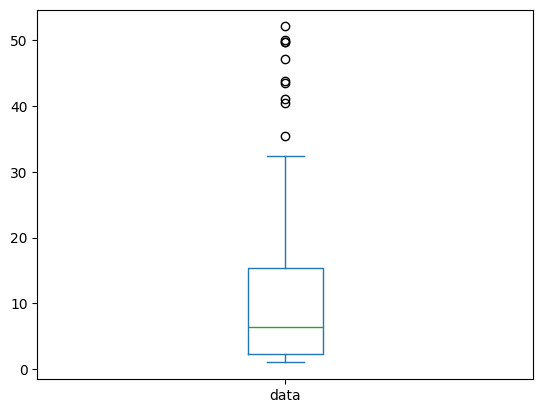

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

# Data Connection

In [5]:
# Download latest version
import kagglehub

path = kagglehub.dataset_download("guillemservera/tennis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\JT von Seggern\.cache\kagglehub\datasets\guillemservera\tennis\versions\41


In [6]:
# Import necessary libraries
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Fetch all tables names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Display table names
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
matches
players
rankings


## Tables

In [7]:
# query on the matches table
# filtering for matches after 1997
query_match = "SELECT * FROM matches where tourney_date > 19980101.0;"

df_match = pd.read_sql_query(query_match, conn)

# query on the ranking table
# filtering the match data to get the top 100 ranked players
query_ranking = "SELECT * FROM rankings where ranking_date > 19980101 and rank < 100;"

df_ranking = pd.read_sql_query(query_ranking, conn)

# query the players table
query_players = "SELECT * FROM players;"

df_players = pd.read_sql_query(query_players, conn)

In [8]:
# Close the cursor and connection
cursor.close()
conn.close()

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# Histogram Variants

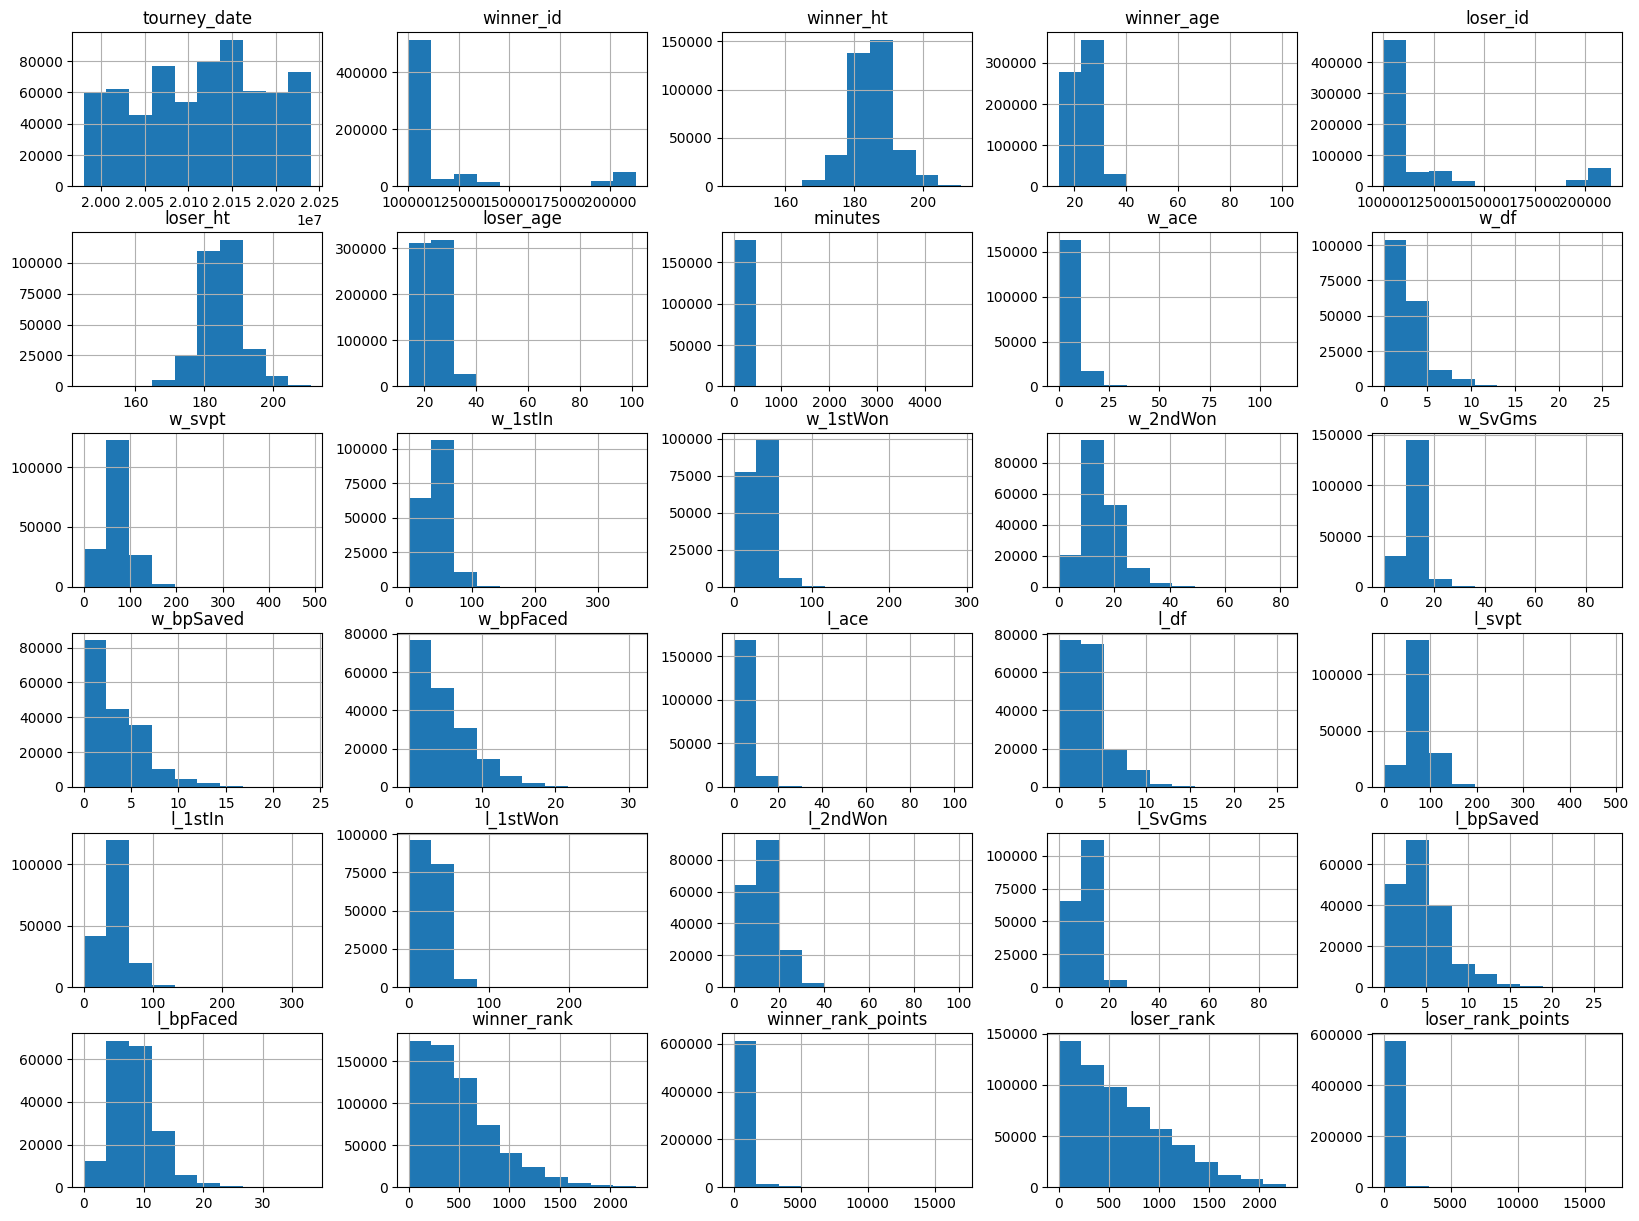

In [9]:
# Histograms for all numerical features in the matches dataset
import matplotlib.pyplot as plt
import seaborn as sns

df_match.hist(figsize=(20,15))
None

### Comparing winner vs loser stats

C:\Users\JT von Seggern\AppData\Local\Temp\ipykernel_22512\574032112.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


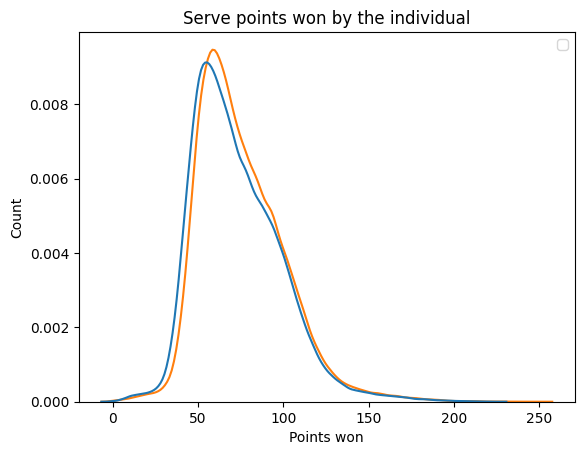

In [ ]:
# Serve Points
df_svpt = df_match[df_match['w_svpt'] < 225]
sns.kdeplot(df_svpt[['w_svpt','l_svpt']])
plt.legend()
plt.title('Serve points won by the individual')
plt.xlabel('Points won')
plt.ylabel('Count')
None

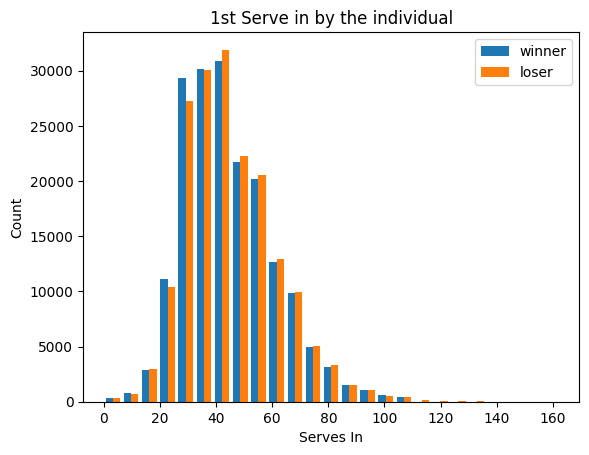

In [11]:
# 1st serve in
df_1stin = df_match[df_match['w_1stIn'] < 110]
plt.hist(df_1stin[['w_1stIn','l_1stIn']], bins=25, label=['winner','loser'])
plt.legend()
plt.title('1st Serve in by the individual')
plt.xlabel('Serves In')
plt.ylabel('Count')
None

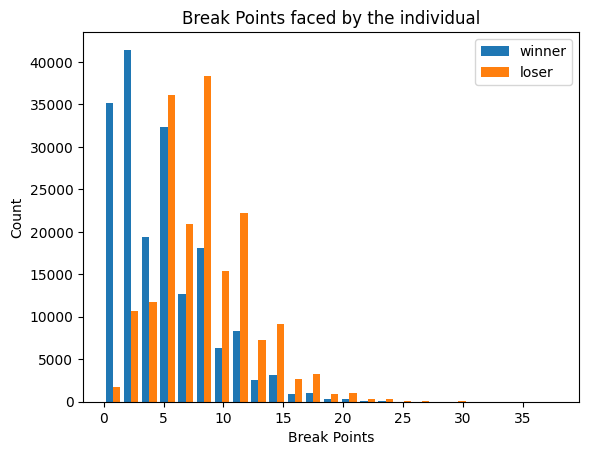

In [12]:
# Break Points Faced
df_bp = df_match[df_match['w_bpFaced'] < 25]
plt.hist(df_bp[['w_bpFaced','l_bpFaced']], bins=25, label=['winner','loser'])
plt.legend()
plt.title('Break Points faced by the individual')
plt.xlabel('Break Points')
plt.ylabel('Count')
None

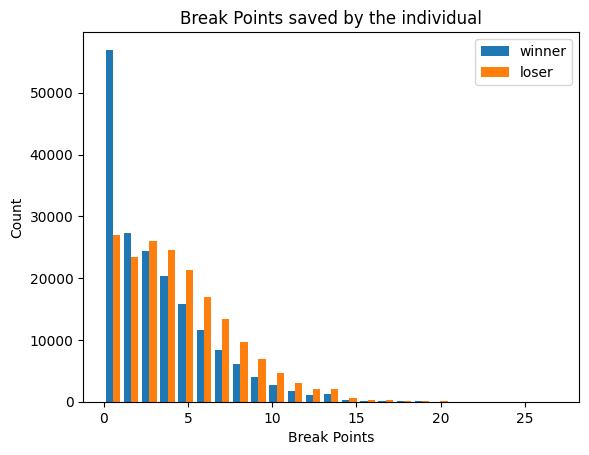

In [13]:
# Break Points Saved
df_bpsv = df_match[df_match['w_bpSaved'] < 25]
plt.hist(df_bpsv[['w_bpSaved','l_bpSaved']], bins=25, label=['winner','loser'])
plt.legend()
plt.title('Break Points saved by the individual')
plt.xlabel('Break Points')
plt.ylabel('Count')
None

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.